<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Загрузка-данный-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данный</a></span></li><li><span><a data-toc-modified-id="Общая-информация-о-датасетах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация о датасетах</a></span></li><li><span><a data-toc-modified-id="Датасет-users-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Датасет users</a></span></li><li><span><a data-toc-modified-id="Датасет-calls-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Датасет calls</a></span></li><li><span><a data-toc-modified-id="Датасет-messages-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Датасет messages</a></span></li><li><span><a data-toc-modified-id="Датасет-internet-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Датасет internet</a></span></li><li><span><a data-toc-modified-id="Датасет-tariffs-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Датасет tariffs</a></span></li><li><span><a data-toc-modified-id="Выводы-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a data-toc-modified-id="Удаление-нулей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление нулей</a></span></li><li><span><a data-toc-modified-id="Расчёты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Расчёты</a></span></li><li><span><a data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Звонки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a data-toc-modified-id="Сообщения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a data-toc-modified-id="Интернет-трафик-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Интернет трафик</a></span></li><li><span><a data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Гипотеза-1.-Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a data-toc-modified-id="Гипотеза-2.-Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Проведение исследования для оператора сотовой связи по выявлению наиболее выгодного тарифа на ограниченной выборке данных о поведении абонентов.

## Загрузка и изучение данных

In [1]:
## Импортируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st

### Загрузка данный

Предварительно загрузили каждый датасет и убедились, что во всех используется стандартный разделитель - запятая

In [2]:
#Для удобства дальнейшей работы создадим словарь с именами датасетов в качестве ключей 
#и самими датасетами в качестве значений
df_dict = {}

for name in ['users', 'calls', 'messages', 'internet', 'tariffs']:
    df_dict[name] = pd.read_csv(f'/datasets/{name}.csv')

### Общая информация о датасетах

In [3]:
## Проверяем загруженные данные
for name in df_dict.keys():
    print('-' * 20)
    print(f'Общая информация о датасете: {name}')
    df_dict[name].info()
    print()

--------------------
Общая информация о датасете: users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

--------------------
Общая информация о датасете: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

--------------------
Общая информация о датасете: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data colu

Из общего обзора видно, что датасеты полностью заполнены, нет пропусков, за исключением ожидаемых в дате прекращения пользования тарифом (churn_date) датасета users. Все названия полей приведены в нижнем регистре в змеинном стиле английскими буквами и не нуждаются в корректировке, за одним исключением в датасете internet.

Все поля с датами у всех датасетов имеют строковый тип, их надо перевести в тип date.
Поля 'id' у датасетов со звонками, сообщениями и интернет трафиком имеют строковый тип, их возможно надо перевести в int.

Так же надо перевести в тип int продолжительность разговоров, т.к. оператор округляет их до минут в большую сторону при каждом разговоре.

Трафик в мегабайтах переводить в целые не надо, т.к. округляется только общая сумма за месяц до гигабайтов в большую сторону.

Есть странный столбец Unnamed в датасете internet которого нет в описании. Похоже, что произошла ошибка при выгрузке из БД, т.к. фйл начинается с запятой, а в соответвующем столбце идут индексы. В целом на предмет исследования не влияет. Можно оставить как есть.

In [4]:
#Проверим, что все идентификаторы в каждом датасете кроме тарифа уникальны.

for dataset_name, id_name in zip(list(df_dict.keys())[: -1], ['user_id', 'id', 'id', 'id']):
    if len(df_dict[dataset_name][id_name].unique()) != df_dict[dataset_name].shape[0]:
        print(f'В датасете - {dataset_name} есть дубли поля - {id_name}!')
    else:
        print('В датасете - {} все поля - {} уникальны, всего {} значений'.format(dataset_name, id_name, df_dict[dataset_name].shape[0]))

В датасете - users все поля - user_id уникальны, всего 500 значений
В датасете - calls все поля - id уникальны, всего 202607 значений
В датасете - messages все поля - id уникальны, всего 123036 значений
В датасете - internet все поля - id уникальны, всего 149396 значений


In [5]:
#Проверим, все ли абоненты есть в остальных датасетах?
for dataset_name in list(df_dict.keys())[1: -1]: #Список датасетов без users и tariffs
    print(dataset_name)
    #Если какогодо user_id из users нет в другом датасете, то он не совершал эти действия
    display(df_dict['users'].loc[~df_dict['users']['user_id'].isin(df_dict[dataset_name]['user_id'])])

calls


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,NaN,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaN,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


messages


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
10,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart
17,1017,73,NaN,Краснодар,Мария,Аленникова,2018-05-22,smart
24,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
...,...,...,...,...,...,...,...,...
462,1462,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart
466,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
469,1469,41,NaN,Сочи,Аксён,Абалкин,2018-07-06,ultra
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart


internet


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Видим, что 8 человек вообще никогда не звонили, 74 не отправляли сообщений, а 3 не использовали интернет.

<a id='empty_users'></a>

In [6]:
#Проверим был ли такой абонент который вообще ничем не пользовался?
df_dict['users'].loc[~df_dict['users']['user_id'].isin(df_dict['calls']['user_id']) \
                     & ~df_dict['users']['user_id'].isin(df_dict['messages']['user_id'])
                     & ~df_dict['users']['user_id'].isin(df_dict['internet']['user_id'])]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Да! Целых два, но оператор все равно снял с них абонентскую плату.

### Датасет users

In [7]:
# Взглянем на сами данные в первых строках
df_dict['users'].head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Для этого датасета возможно:
* посмотреть распределение возраста
* проверить на дубли из-за ошибочного написания городов
* посмотреть распределение абонентов по городам
* проверить, что в столбце тариф есть только два значения

In [8]:
#Посмотрим на распределение возраста
df_dict['users'].describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


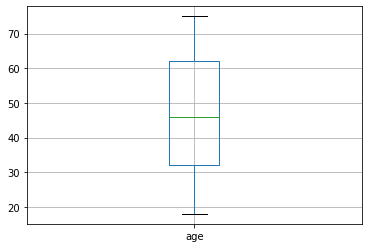

In [9]:
df_dict['users'].boxplot('age')

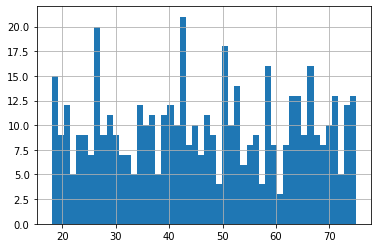

In [10]:
df_dict['users']['age'].hist(bins=50)

Среднее и медиана практически равны, распределение симметричное, равномерное. Среди абонентов представлены все возраста.

In [11]:
#Проверим на дубли в названиях городов из-за ошибок в написании
sorted(list(df_dict['users']['city'].unique()))

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

Все города написаны правильно, повторений нет.

In [12]:
#Посмотрим распределение абонентов по городам
df_dict['users']['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Химки               1
Подольск            1
Нижневартовск       1
Иваново             1
Name: city, Length: 76, dtype: int64

In [13]:
#Посмотрим распределение абонентов по городам в процентах от общего числа
df_dict['users']['city'].value_counts() / df_dict['users'].shape[0]

Москва             0.198
Санкт-Петербург    0.078
Новосибирск        0.032
Омск               0.028
Казань             0.028
                   ...  
Архангельск        0.002
Химки              0.002
Подольск           0.002
Нижневартовск      0.002
Иваново            0.002
Name: city, Length: 76, dtype: float64

In [14]:
#Проверим столбец tariff
df_dict['users']['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Представлены только два тарифа, как и должно быть.
Две третьи абонентов используют тариф smart

### Датасет calls

In [15]:
# Посмотрим на данные датасета calls
df_dict['calls'].head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
df_dict['calls'].tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Столбец id имеет строковый тип, т.к. для формирования ключа используется идентификатор абонента к которому через нижнее подчеркиваение добавляется номер сессии(звонка). В целом можно перевести в тип int выделив суфиксы, однако смысла в этом особо нет, т.к. на цели исследования это не влияет.

In [17]:
#Посмотрим на столбец с продолжительностью разговора
df_dict['calls']['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

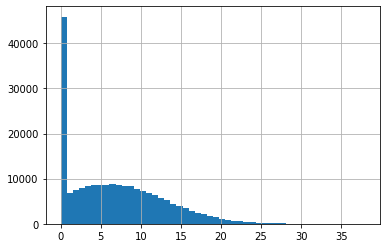

In [18]:
df_dict['calls']['duration'].hist(bins=50)

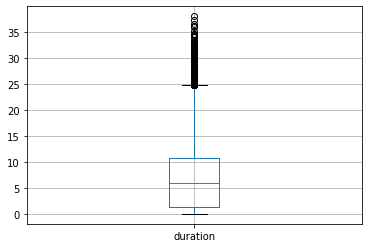

In [19]:
df_dict['calls'].boxplot('duration')

<a id='zerro_calls'></a>
Из распределения видно, что есть большой выброс пропущенных звонков, примерно 45 тыс из 200.
Остальные звонки имеют куполообразное распределение. Среднее всего на 10% больше медианы. Скорее всего медиана смещина влево из-за пропущенных звонков.

In [20]:
#Подсчитаем процент пропущенных звонков:
df_dict['calls'].query('duration == 0').shape[0] / df_dict['calls'].shape[0]

0.19551644316336553

### Датасет messages

In [21]:
# Посмотрим на данные датасета messages
df_dict['messages'].head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Ничего необычного. Формат в поле id аналогичен датасету calls

### Датасет internet

In [22]:
# Посмотрим на данные датасета internet
df_dict['internet'].head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [23]:
df_dict['internet'].tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Видно, что столбец Unnamed:0 дублирует индексы. Как и предполагалось, скорее всего при выгрузке были захвачены не только значения но и индексы строк. Столбец можно удалить

Столбец id имеет аналогичную структуру как в датасете calls

In [24]:
#Посмотрим на распределение потребления интернет трафика по сессиям
df_dict['internet']['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

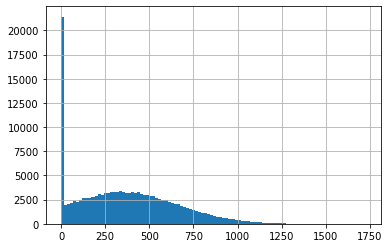

In [25]:
df_dict['internet']['mb_used'].hist(bins=100)

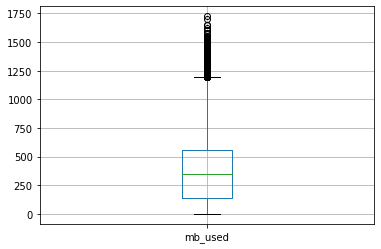

In [26]:
df_dict['internet'].boxplot('mb_used')

Распределение очень похоже на распределение продолжительности телефонных разговоров, однако в описании нет указаний насчёт нулевого трафика. Возможно это неудачные сессии соединения или данные тех кто вообще не пользовался интернетом, а возможно ошибка при загрузке.

In [27]:
#Посмотрим на данные с нулевым интернет трафиком
df_dict['internet'].query('mb_used == 0').head()

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000


In [28]:
df_dict['internet'].query('mb_used == 0').shape[0] / df_dict['internet'].shape[0]

0.13118155773916304

13% нулевых значений могут заметно влиять на среднее и медиану. 

In [29]:
df_dict['internet'].query('mb_used != 0')['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

Среднее выборки без нулей 426, а с нулями 370, медианы 400 и 348 соответственно

### Датасет tariffs

In [30]:
# Посмотрим на данные датасета tariffs
df_dict['tariffs']

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Данные по обоим тарифам представлены полностью

### Выводы

Все датасеты имеют стандартный разделитель, полностью заполнены, нет пропусков, за исключением ожидаемых в дате прекращения пользования тарифом (churn_date) датасета users. Все названия полей приведены в нижнем регистре в змеинном стиле английскими буквами и не нуждаются в корректировке, за одним исключением в датасете internet.
* Все поля с датами у всех датасетов имеют строковый тип, их надо перевести в тип date.
* Поля с идентификаторами в каждом датасете, кроме тарифа, уникальны. Повторений нет.
* Поля 'id' у датасетов со звонками, сообщениями и интернет трафиком имеют строковый тип, их возможно  перевести в int, но на предмет исследования это не влияет. Можно оставить как есть.
* 8 человек вообще никогда не звонили, 74 не отправляли сообщений, а 3 не использовали интернет, а 2 абонента вообще не совершали никаких действий.
-----

*Датасет users:*
- Среднее и медиана возраста практически равны, распределение симметричное. Среди абонентов представлены все возраста. Возможно для более углубленного изучения в будущих исследованиях надо так же учитывать пол абонента, т.к. это может оказывать существенное влияние на поведение.
- В названиях городов повторений из-за неправильного написания не обнаружено.
- Почти 20% абонентов из Москвы.
- Примерно 2/3 абонентов используют тариф smart

*Датасет calls:*
- Из распределения продолжительности звонков видно, что есть большой выброс пропущенных звонков с нулевой продолжительностью, примерно 45 тыс из 200, около 20%. Остальные звонки имеют куполообразное распределение. Среднее всего на 10% больше медианы. Скорее всего медиана и среднее смещены влево из-за пропущенных звонков.
- Так же надо перевести в тип int продолжительность разговоров, т.к. оператор округляет их до минут в большую сторону при каждом разговоре, нулевые значения останутся нулями, т.к. в описании сказано, что это пропущенные звонки.

*Датасет messages:*
- Ничего необычного. Формат в поле id аналогичен датасету calls

*Датасет internet:*
- Трафик в мегабайтах переводить в целые не надо, т.к. округляется только общая сумма за месяц до гигабайтов в большую сторону.
- Есть странный столбец Unnamed в датасете internet которого нет в описании. Похоже, что произошла ошибка при выгрузке из БД, т.к. фйл начинается с запятой, а в соответвующем столбце идут индексы. В целом на предмет исследования не влияет. Можно удалить.
- Распределение интернет трафика очень похоже на распределение продолжительности звонков. Число нулевых сессий около 13%, что смещает медиану и среднее влево.

*Датасет tariffs:*
- Данные по обоим тарифам представлены полностью
- Количество мегабайт из пакета надо перевести в гигабайты, т.к. тарификация происходит в гигабайтах

## Подготовка данных

### Дубликаты

Можно удалить столбец Unnamed:0 из датасета internet 

In [31]:
df_dict['internet'].drop('Unnamed: 0', axis=1, inplace=True)
df_dict['internet'].head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Другие дубли можно не искать, так как поля идентификаторов в каждом датасете уникальны.

### Изменение типа данных

- Все поля дат во всех датасетах надо перевести в тип date
- В датасете calls надо перевести в тип int поле duration - продолжительность звонка в минутах

In [32]:
#Округлим значения продолжительности разгооров до большего целого и заменим тип данных на int
print('До округления:')
display(df_dict['calls']['duration'].sum())
display(df_dict['calls'].head(3))

df_dict['calls']['duration'] = df_dict['calls']['duration'].apply(np.ceil).astype('int')

print('После округления и изменения типа:')
display(df_dict['calls']['duration'].sum())
df_dict['calls'].head(3)

До округления:


1368790.0399999998

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


После округления и изменения типа:


1450301

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000


In [33]:
#Видно что сумма увеличилась
1450301/1368790.0399999998

1.0595496442975287

In [34]:
#Выведем все названия полей с датами
for dataset_name in list(df_dict.keys())[: -1]:
    print('Датасет:', dataset_name)
    for column in list(df_dict[dataset_name].columns):
        if 'date' in column:
            print('\t',column)
    print('-' * 20)

Датасет: users
	 churn_date
	 reg_date
--------------------
Датасет: calls
	 call_date
--------------------
Датасет: messages
	 message_date
--------------------
Датасет: internet
	 session_date
--------------------


In [35]:
#Переведём все поля с датами в тип date
for dataset_name, datafield_name in zip(['users'] + list(df_dict.keys())[: -1], #users будет два раза, т.к. там два поля с датами
                                        ['churn_date', 'reg_date', 'call_date', 'message_date', 'session_date']):

    df_dict[dataset_name][datafield_name] = \
        pd.to_datetime(df_dict[dataset_name][datafield_name], format="%Y-%m-%d")

In [36]:
#Проверяем
for dataset_name in list(df_dict.keys())[: -1]:
    print(dataset_name)
    df_dict[dataset_name].info()
    print('-' * 20)

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
--------------------
calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
--------------------
messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object


In [37]:
#Проверим, что все даты регистрации относятся к 2018 году
df_dict['users'].loc[df_dict['users']['reg_date'].dt.year != 2018]['reg_date'].count()

0

In [38]:
#Убедимся, что все даты отмены тарифа были после даты регистрации
#Количество пользователей датасета users с датой отмены меньше даты регистрации должно равнятся 0
df_dict['users'].loc[df_dict['users']['churn_date'] < \
                     df_dict['users']['reg_date']]['user_id'].count()

0

In [39]:
#Переведём мегабайты в тарифе в гигабайты
df_dict['tariffs']['mb_per_month_included'] = df_dict['tariffs']['mb_per_month_included'] / 1024

#Значения и так получаются целые, но для сохранения методики округлим вверх и приведём к int
df_dict['tariffs']['mb_per_month_included'] = df_dict['tariffs']['mb_per_month_included'].apply(np.ceil).astype('int')

#Заменим название столбца
df_dict['tariffs'].rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

df_dict['tariffs']

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Удаление нулей

Т.к. в дальнейшем будем оперировать средними знамениями продолжительности разговоров, трафиком и числом сообщений, то нули будут существенно влиять на среднее и медиану. С одной стороны их лучше удалить, т.к. они будут уменьшать среднюю выручку на один звонок и т.п.. С другой стороны абонент всетаки сделал звонок, хоть и не дозвонился, попытался выйти в интернет, хоть и не смог, и таких случаев заметное число и эти значения так же надо учитывать.
   Оставим возможность все пересчитать без учета этих нулей и посмотреть, влияет ли это вообще на выбор тарифа.

In [40]:
#Удаление нулевых строк длительности разговоров и интернет трафика
delete = 0 # Флаг для удаления нулевых строк, если 1 удаляем, если 0 оставляем как есть

if delete: #Проверяем нужно ли удалять нули
    for dataset_name, column_name in zip(['calls', 'internet'], ['duration', 'mb_used']):

        print('Датасет:', dataset_name) #Печатаем число нулевых строк и датасет
        print("Число нулевых строк:", 
              len(df_dict[dataset_name].loc[df_dict[dataset_name][column_name] == 0]))
        
        #Оставляем только не нулевые строки
        df_dict[dataset_name] = \
            df_dict[dataset_name].loc[df_dict[dataset_name][column_name] != 0]

        print("Осталось нулевых строк:",  #Делаем проверку результата
              len(df_dict[dataset_name].loc[df_dict[dataset_name][column_name] == 0]))
        print('-' * 20)
else:
    print('Дальнейшие расчёты ведутся без удаления нулей!')

Дальнейшие расчёты ведутся без удаления нулей!


### Расчёты
Для каждого пользователя необходимо расчитать:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану).

In [41]:
#Подсчитаем сумму потраченых минут разговора, сумму потраченых мегабайт 
#и число сообщений по месяцам для каждого абонента

#Создадим словарь для хранения датасетов
df_counts = {}

for dict_key, dataset_name, datafield_name, column_name, func_name in zip(
    ['minutes_month', 'messages_month', 'gb_month'], #Имена новых датасетов
    ['calls', 'messages', 'internet'], #Имена датасетов откуда берутся данные
    ['call_date', 'message_date', 'session_date'], #Имена полей для группировки по месяцам
    ['duration', 'id', 'mb_used'], #Имена полей для расчёта
    ['sum', 'count', 'sum']): #Применяемые функции
    
    #Создаем временный датафрейм со всеми абонентами в качестве индексов и месяцами в качестве столбцов
    #В него будем добавлять результаты группировок, а потом этот датафрейм бодем добавлять в словарь
    #Так все датафреймы будут одинаковой размерности и с ними легко будет работать при расчете выручки
    temp_df = pd.DataFrame(index=df_dict['users']['user_id'])
    
    
    #Группируем по месяцам и добавляем во временный датафрейм.
    temp_df = temp_df.merge(df_dict[dataset_name].pivot_table(index='user_id', 
                                columns=df_dict[dataset_name][datafield_name].dt.month, 
                                values=column_name, aggfunc=func_name),
                on='user_id', how='outer')
    
    #Добавляем полученный датафрейм в словарь
    df_counts[dict_key] = temp_df
    
    #Выводим на экран первые строки для проверки
    print(dict_key)
    display(df_counts[dict_key].head())

minutes_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


messages_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


gb_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


На всякий случай проверим строки для [абонентов](#empty_users) которые не совершили какие-то действия
- 1091 - никогда не звонил
- 1001 - не отправлял смс
- 1273 - не выходил в интернет
- 1371 - не совершил ни одного действия

In [42]:
#Выведем строки для соответвующих абонентов и проверим, что все верно
for dataset_name in df_counts.keys():
    print(dataset_name)
    display(df_counts[dataset_name].query('user_id in [1091, 1001, 1273, 1371]'))

minutes_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,NaN,NaN,NaN,NaN,220.0,230.0,253.0,253.0,223.0,315.0,272.0,260.0
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


messages_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,NaN,NaN,NaN,NaN,30.0,30.0,35.0,31.0,32.0,44.0,28.0,42.0
1273,NaN,NaN,NaN,NaN,21.0,38.0,37.0,41.0,32.0,35.0,29.0,39.0
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


gb_month


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1091,NaN,NaN,NaN,NaN,10703.37,10236.19,16444.98,12633.88,16597.11,15644.73,11864.25,13280.45
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Да все верно

In [43]:
#Переведём значения в расчетном датасете интернет трафика gb_month в гигабайты
df_counts['gb_month'] = (df_counts['gb_month'] / 1024).apply(np.ceil)
df_counts['gb_month'].head(3)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0


Для учёта взымания абонентской платы с пользователей которые не совершали действий в первые месяцы сначала добавим абонентскую плату каждому пользователю

In [44]:
#Добавим в словарь с расчётными датафреймами датафрейм для выручки
df_counts['income_month'] = pd.DataFrame(index=df_dict['users']['user_id'], columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df_counts['income_month'].head(3)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Заполним датафрейм выручки значениями абонентской платы по тарифу
for index in df_counts['income_month'].index: #Перебераем датасет по строкам
    
    #Месяц подключения тарифа
    first_month = pd.DatetimeIndex(df_dict['users'].query('user_id == @index')['reg_date']).month.values[0]
    
    #Месяц отключения тарифа
    last_month = pd.DatetimeIndex(df_dict['users'].query('user_id == @index')['churn_date']).month.values[0]
    
    #Наименование тарифа
    user_tariff = df_dict['users'].query('user_id == @index')['tariff'].values[0]
    
    if pd.isnull(last_month): #Если отключения не было, то последний месяц декабрь
        last_month = 12
    
    for i in range(first_month, last_month + 1): #В столбцы использования тарифа добавляем соответсвующую аб. плату
        df_counts['income_month'].loc[index, i] = \
            df_dict['tariffs'].loc[df_dict['tariffs']['tariff_name'] == user_tariff, 'rub_monthly_fee'].values[0]
    

In [46]:
df_counts['income_month'].head(2)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950,1950,1950,1950,1950,1950,1950,1950
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,550


Расчитаем помесячную выручку с каждого пользователя (вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем все к абонентской плате этого пользователя).

In [47]:
for tariff_index, tariff_name in zip(df_dict['tariffs'].index, df_dict['tariffs']['tariff_name']): #Цикл по тарифам
    
    #Формируем список абонентов для каждого тарифа    
    tariff_users = df_dict['users'].query('tariff == @tariff_name')['user_id'] 
    
    #Временный датасет для накопления общей суммы платежей по тарифу
    tariff_income = pd.DataFrame(index=df_counts['income_month'].index, columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    
    #Перебираем каждый вычесленный датасет: минуты, сообщения, трафик
    for counts_dataset, column_included, column_per_unit in zip(list(df_counts.keys())[: -1], 
                              ['minutes_included', 'messages_included', 'gb_per_month_included'], #включено в тариф
                              ['rub_per_minute', 'rub_per_message', 'rub_per_gb']): #единичные расценки
        
        #Временный датасет для расчётов дохода по каждой услуге
        temp_df = pd.DataFrame(index=tariff_users)
       
        #Заполняем временный датасет данными для этой услуги за вычетом количества указанного в тарифе
        #для пользователей данного тарифа
        tariff_income = temp_df.merge(df_counts[counts_dataset].query("user_id in @tariff_users") - \
                                df_dict['tariffs'].query('tariff_name == @tariff_name')[column_included][tariff_index],
                 on='user_id', how='outer') #Вычитаем положенный по тарифу лимит для данной услуги и объединяем по индексу

        #Удаляем отрицательные значения из временного датафрейма
        tariff_income = tariff_income.where(tariff_income >= 0, 0) #Все NaN так же заменятся нулями

        #Умножаем превышения лимитов по услуге на расценки за единицу согласоно тарифу
        tariff_income = tariff_income * df_dict['tariffs'].query('tariff_name == @tariff_name')[column_per_unit][tariff_index]

       
        #Добавляем стоимость превышения тарифа к общей сумме
        df_counts['income_month'].loc[tariff_users] += tariff_income


Проверим [абонентов](#empty_users) которые не совершили никаких действий: 1128, 1371

In [48]:
df_dict['users'].query('user_id in [1128, 1371]')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [49]:
df_counts['income_month'].query('user_id in [1128, 1371]')

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550


### Выводы

- Из датасета internet был удалён ошибочный столбвец Unnamed: 0
- Продолжительность звонков в минутах была округлена вверх и приведена к типу int, что увеличело общую сумму минут на 6% с 1368790.03 до 1450301
- Во всех датасетах поля с датами были приведены к типу date
- Все даты отмены тарифа были не раньше дат регистрации
- Ежемесячный объем трафика переведён в гигабайты и округлен в большую сторону
- Оставлена возможность все пересчитать без учета нулевых вызовов и трафика для определения их влияние на выгодность тарифов
- Произведён расчёт ежемесячной выручки для каждого абонента в рублях

## Анализ данных

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Каково их среднее количество, дисперсия и стандартное отклонение. Так же нужно построить гистограммы и описать распределения.

In [50]:
#Создадим два набора пользователей для каждого тарифа
tariff_users = {}
for name in ['smart', 'ultra']:
    tariff_users[name] = df_dict['users'].query('tariff == @name')['user_id'] 

In [51]:
#Создадим функцию, которая по заданному датасету считает статистику и строит гистограмму 
def show_info(dataset_name):
    for tariff in tariff_users.keys():
        
        #Выпрямляем датасет в один столбец, при этом все NaN не входят в новый датасет
        s = pd.DataFrame(df_counts[dataset_name].loc[\
                         df_counts[dataset_name].index.isin(tariff_users[tariff])].\
                         values.tolist()).stack()
        print()
        print(f'=== Данные по тарифу {tariff}: === ')
        print(f'Сумма:_________________', s.sum())
        print(f'Среднее:_______________', s.mean())
        print(f'Дисперсия:_____________', np.var(s))
        print(f'Стандартное отклонение:', np.std(s))
        s.hist(bins=50)

### Звонки


=== Данные по тарифу smart: === 
Сумма:_________________ 931577.0
Среднее:_______________ 419.0629779577148
Дисперсия:_____________ 35828.06530953033
Стандартное отклонение: 189.2830296395594

=== Данные по тарифу ultra: === 
Сумма:_________________ 518724.0
Среднее:_______________ 545.4511041009464
Дисперсия:_____________ 94104.36117385984
Стандартное отклонение: 306.76434143143143


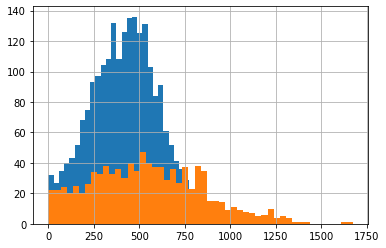

In [52]:
show_info('minutes_month')

Тариф smart:
Распределение количества минут использованных абонентами в месяц имеет куполообразный вид близкий к нормльному распределению.
Среднее количество минут в месяц по тарифу - 419
Стандартное отклонение - 189

Тариф ultra:
Распределение количества звонков имеет очень широкий купол, количество использованных минут распределено более равномерно по сравнению с тарифом smart
Среднее количество минут в месяц по тарифу - 545
Стандартное отклонение - 306

### Сообщения


=== Данные по тарифу smart: === 
Сумма:_________________ 74413.0
Среднее:_______________ 38.71644120707596
Дисперсия:_____________ 717.220843110227
Стандартное отклонение: 26.780979129042816

=== Данные по тарифу ultra: === 
Сумма:_________________ 48623.0
Среднее:_______________ 61.161006289308176
Дисперсия:_____________ 2107.0055235156838
Стандартное отклонение: 45.90212983637779


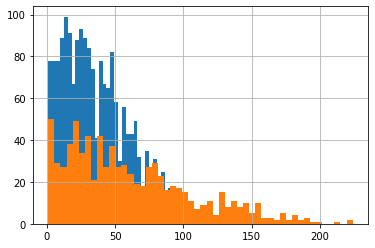

In [53]:
show_info('messages_month')

Тариф smart:
Распределение количества сообщений в месяц имеет вид близкий к распределению Пуассона.
Среднее количество сообщений в месяц по тарифу - 38
Стандартное отклонение - 26

Тариф ultra:
Распределение количества сообщений в месяц так же имеет вид близкий к распределению Пуассона, но более пологий чем у smart.
Среднее количество сообщений в месяц по тарифу - 61
Стандартное отклонение - 45

### Интернет трафик


=== Данные по тарифу smart: === 
Сумма:_________________ 36397.0
Среднее:_______________ 16.33617594254937
Дисперсия:_____________ 32.908978554322495
Стандартное отклонение: 5.73663477609674

=== Данные по тарифу ultra: === 
Сумма:_________________ 19202.0
Среднее:_______________ 19.694358974358973
Дисперсия:_____________ 94.05017330703484
Стандартное отклонение: 9.697946860394463


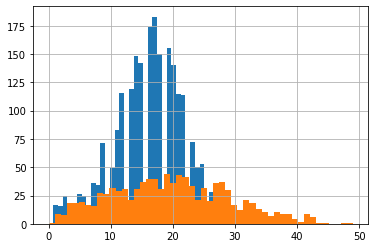

In [54]:
show_info('gb_month')

Тариф smart:
Распределение количества гигабайт использованных абонентами в месяц имеет явно выраженную куполообразную форму нормльного распределения.
Среднее количество гигабайт в месяц по тарифу - 16 (превышает количество гб по тарифу)
Стандартное отклонение - 6

Тариф ultra:
Распределение количества гигабайт имеет очень широкий купол, форма купола близка к нормальному распределению
Среднее количество гигабайт в месяц по тарифу - 20
Стандартное отклонение - 10

### Выводы

- Распределения тарифов smart и ultra по каждой услуги имеют одинаковый вид
- Распределения тарифа ultra для всех услуг имеют более широкий вид по сравнению с тарифом smart, т.е. пользователи показывают более разнообразное поведение

- Распределения потраченных минут и использованных гигабайт обоих тарифов имеют выраженный куполообразный вид нормального распределения
- Распределение использованных сообщений для обоих тарифов имеет вид близкий к распределению Пуассона

- Среднее значение потраченных минут для тарифа smart примерно 80% от значения указанного в тарифе, среднее значение испольованных сообщений примерно 60% от указаных в тарифе, а среднее значение использованых гб больше указаного в тарифе примерно на 6%

- Среднее значение потраченных минут для тарифа ultra примерно 18% от значения указанного в тарифе, среднее значение испольованных сообщений примерно 6% от указаных в тарифе, а среднее значение использованых гб примерно 40% от указанного в тарифе

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- В качестве нулевой гипотезы выберем гипотезу о равенстве средних для этих вух совокумностей, т.к. нулевая гипотеза формулируется как равенство. В качестве альтернативной, средняя выручка в месяц у тарифа ultra больше, чем у тарифа smart

- Т.к. средняя выручка по каждому тарифу не зависят друг от друга, то будем использовать критерий для проверки равенства средних двух независимых генеральных совокупностей.

In [55]:
#Подсчитаем среднюю выручку для каждого тарифа
smart_income_mean = pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(tariff_users['smart'])].\
                         values.tolist()).stack().mean()
print("Средняя выручка тарифа smart:", smart_income_mean)

ultra_income_mean = pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(tariff_users['ultra'])].\
                         values.tolist()).stack().mean()
print("Средняя выручка тарифа ultra:", ultra_income_mean)

Средняя выручка тарифа smart: 1289.6417040358745
Средняя выручка тарифа ultra: 2070.030425963489


In [56]:
#Проверим гипотезу о равенстве средних двух независимых выборок.

results = st.ttest_ind(pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(tariff_users['smart'])].\
                         values.tolist()).stack(), 
                       pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(tariff_users['ultra'])].\
                         values.tolist()).stack(),
                       equal_var = False)

print('p-значение: ', results.pvalue)

#Делаем проверку для односторонних гипотез
if (results.pvalue / 2 < 0.01) and (ultra_income_mean > smart_income_mean):
    print("Отвергаем гипотезу о равенстве средней выручки двух тарифов")
else:
    print("Не отвергаем гипотезу о равенстве средней выручки двух тарифов")

p-значение:  1.927011394420941e-250
Отвергаем гипотезу о равенстве средней выручки двух тарифов


Вероятность того, что средныие выручки двух тарифов равны очень, очень мала! Нулевая гипотеза выглядит практически не реальной.

### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- В качестве нулевой гипотезы выберем гипотезу о равенстве выручки в Москве и всех остальных регионах, т.к. нулевая гипотеза формулируется как равенство. В качестве альтернативной, средняя выручка в Москве отличается от остальных регионов.

- Т.к. средняя выручка по каждому региону не зависят друг от друга, то будем использовать критерий для проверки равенства средних двух независимых генеральных совокупностей.

In [57]:
#Подсчитаем среднюю выручку для Москвы и других регионов

Msk_income_mean = pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(df_dict['users'].query('city == "Москва"')['user_id'])].\
                         values.tolist()).stack().mean()
print("Средняя выручка для Москвы:", Msk_income_mean)

Other_income_mean = pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(df_dict['users'].query('city != "Москва"')['user_id'])].\
                         values.tolist()).stack().mean()
print("Средняя выручка остальных регионов:", Other_income_mean)

Средняя выручка для Москвы: 1546.7135842880523
Средняя выручка остальных регионов: 1524.7251439539348


In [58]:
#Проверим гипотезу о равенстве средних двух независимых выборок.

results = st.ttest_ind(pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(df_dict['users'].query('city == "Москва"')['user_id'])].\
                         values.tolist()).stack(), 
                       pd.DataFrame(df_counts['income_month'].loc[\
                         df_counts['income_month'].index.isin(df_dict['users'].query('city != "Москва"')['user_id'])].\
                         values.tolist()).stack(),
                       equal_var = False)

print('p-значение: ', results.pvalue)

#Делаем проверку для односторонних гипотез
if (results.pvalue < 0.01):
    print("Отвергаем гипотезу о равенстве средней выручки в Москве и других регионах")
else:
    print("Не отвергаем гипотезу о равенстве средней выручки в Москве и других регионах")

p-значение:  0.5216952110000278
Не отвергаем гипотезу о равенстве средней выручки в Москве и других регионах


Вероятность того, что средние значения выручки в Москве и остальных регионах равны 52%, это очень значительный показатель.
Надо придерживаться нулевой гипотезы - средняя выручка в Москве и других регионах совпадает.

### Выводы

* Критерий значимости для проверки гипотезы о равенстве средних выручек для двух тарифов исчезающе мал. Гипотеза выглядит практически не реальной и должна быть отвергнута

* Критерий значимости для проверки гипотезы о равенстве средних выручки в Москве и других регионах очень высок, соответсвенно гипотеза о том, что выручка в Москве отличается от других регионов выглядит не правдоподобной.

## Общий вывод

Датасеты полностью заполнены, нет пропусков, за исключением ожидаемых в дате прекращения пользования тарифом (churn_date) датасета users. Все названия полей приведены в нижнем регистре в змеинном стиле английскими буквами и не нуждаются в корректировке, за одним исключением в датасете internet.

Похоже, что произошла ошибка при выгрузке из БД датасета internet, т.к. там есть странный столбец Unnamed которого нет в описании

Есть значительное количество звонков нулевой длинны и интернет сессий с нулевым количеством интернет трафика. Удаление или сохранение этих значений не оказывает влияния на проверку гипотез о равенстве или отличии средних значений.

<b>Подготовка данных</b>

- Из датасета internet был удалён ошибочный столбвец Unnamed: 0
- Продолжительность звонков в минутах была округлена вверх и приведена к типу int, что увеличело общую сумму минут на 6% с 1368790.03 до 1450301
- Во всех датасетах поля с датами были приведены к типу date
- Все даты отмены тарифа были не раньше дат регистрации
- Ежемесячный объем трафика переведён в гигабайты и округлен в большую сторону
- Оставлена возможность все пересчитать без учета нулевых вызовов и трафика для определения их влияние на выгодность тарифов
- Произведён расчёт ежемесячной выручки для каждого абонента в рублях

<b>Статистические характеристики</b>
- Распределения тарифов smart и ultra по каждой услуги имеют одинаковый вид
- Распределения тарифа ultra для всех услуг имеют более широкий вид по сравнению с тарифом smart, т.е. пользователи показывают более разнообразное поведение

- Распределения потраченных минут и использованных гигабайт обоих тарифов имеют выраженный куполообразный вид нормального распределения
- Распределение использованных сообщений для обоих тарифов имеет вид близкий к распределению Пуассона

- Среднее значение потраченных минут для тарифа smart примерно 80% от значения указанного в тарифе, среднее значение испольованных сообщений примерно 60% от указаных в тарифе, а среднее значение использованых гб больше указаного в тарифе примерно на 6%

- Среднее значение потраченных минут для тарифа ultra примерно 18% от значения указанного в тарифе, среднее значение испольованных сообщений примерно 6% от указаных в тарифе, а среднее значение использованых гб примерно 40% от указанного в тарифе

<b>Проверка гипотез</b>

* Критерий значимости для проверки гипотезы о равенстве средних выручек для двух тарифов исчезающе мал. Гипотеза выглядит практически не реальной и должна быть отвергнута

* Критерий значимости для проверки гипотезы о равенстве средних выручки в Москве и других регионах очень высок, соответсвенно гипотеза о том, что выручка в Москве отличается от других регионов выглядит не правдоподобной.

<b>Дополнительные рекомендации</b>

Для более глубокого анализа поведения потребителей можно так же учитывать возраст и пол абонентов.

# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нужно выполнить предварительный анализ тарифов на небольшой выборке клиентов - 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Описание тарифов**

<b>Тариф «Смарт»</b>
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
      * минута разговора: 3 рубля
      * сообщение: 3 рубля
      * 1 Гб интернет-трафика: 200 рублей

<b>Тариф «Ультра»</b>
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
      * минута разговора: 1 рубль
      * сообщение: 1 рубль
      * 1 Гб интернет-трафика: 150 рублей

Примечание: Оператор округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.


**Описание набора данных**
Таблица users (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Используемые технологии**

Python, Pandas, Matplotlib, NumPy, SciPy,<br>
описательная статистика,<br>
проверка статистических гипотез